In [137]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import statsmodels.api as sm 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [138]:
cvd = pd.read_csv("heart_2020_cleaned.csv")

In [139]:
cvd

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [140]:
cvd.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [141]:
cvd.shape

(319795, 18)

In [142]:
cvd.dtypes

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

In [143]:
cvd.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [144]:
#Checking for Data Duplication
cvd.duplicated().sum()

18078

In [145]:
#Dropping Duplicated Data
cvd.drop_duplicates(inplace=True)
cvd.duplicated().sum()

0

In [146]:
#Exploring Categories within the Categorical Data
cvd['Diabetic'].value_counts()

No                         251796
Yes                         40589
No, borderline diabetes      6776
Yes (during pregnancy)       2556
Name: Diabetic, dtype: int64

<AxesSubplot:xlabel='Diabetic', ylabel='count'>

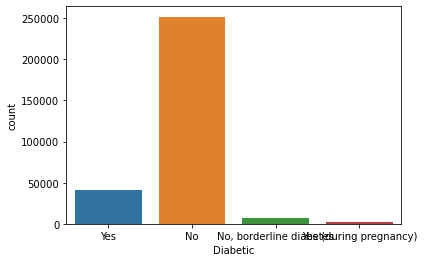

In [147]:
sns.countplot(x=cvd["Diabetic"])

In [148]:
cvd['Race'].value_counts()

White                             227724
Hispanic                           27107
Black                              22810
Other                              10891
Asian                               7993
American Indian/Alaskan Native      5192
Name: Race, dtype: int64

In [149]:
cvd['Stroke'].value_counts()

No     289653
Yes     12064
Name: Stroke, dtype: int64

In [150]:
cvd['HeartDisease'].value_counts()

No     274456
Yes     27261
Name: HeartDisease, dtype: int64

In [151]:
cvd['Smoking'].value_counts()

No     174312
Yes    127405
Name: Smoking, dtype: int64

In [152]:
cvd['AlcoholDrinking'].value_counts()

No     280136
Yes     21581
Name: AlcoholDrinking, dtype: int64

In [153]:
cvd['DiffWalking'].value_counts()

No     257362
Yes     44355
Name: DiffWalking, dtype: int64

In [154]:
cvd['Sex'].value_counts()

Female    159671
Male      142046
Name: Sex, dtype: int64

In [155]:
cvd['AgeCategory'].value_counts()

65-69          31670
60-64          31219
70-74          29273
55-59          27610
50-54          23736
80 or older    23352
75-79          20713
45-49          20518
18-24          19998
40-44          19837
35-39          19526
30-34          17953
25-29          16312
Name: AgeCategory, dtype: int64

In [156]:
cvd['Diabetic'].value_counts()

No                         251796
Yes                         40589
No, borderline diabetes      6776
Yes (during pregnancy)       2556
Name: Diabetic, dtype: int64

In [157]:
cvd['PhysicalActivity'].value_counts()

Yes    230412
No      71305
Name: PhysicalActivity, dtype: int64

In [158]:
cvd['GenHealth'].value_counts()

Very good    104796
Good          91239
Excellent     59737
Fair          34659
Poor          11286
Name: GenHealth, dtype: int64

In [159]:
cvd['SleepTime'].value_counts()

8.0     90202
7.0     89445
6.0     64655
5.0     19101
9.0     15853
10.0     7782
4.0      7730
12.0     2204
3.0      1992
2.0       788
1.0       551
11.0      415
14.0      243
16.0      236
15.0      189
18.0      102
13.0       97
20.0       64
24.0       30
17.0       21
22.0        9
19.0        3
23.0        3
21.0        2
Name: SleepTime, dtype: int64

In [160]:
cvd['Asthma'].value_counts()

No     259066
Yes     42651
Name: Asthma, dtype: int64

In [161]:
cvd['KidneyDisease'].value_counts()

No     289941
Yes     11776
Name: KidneyDisease, dtype: int64

In [162]:
cvd['SkinCancer'].value_counts()

No     272425
Yes     29292
Name: SkinCancer, dtype: int64

In [163]:
#EDA

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

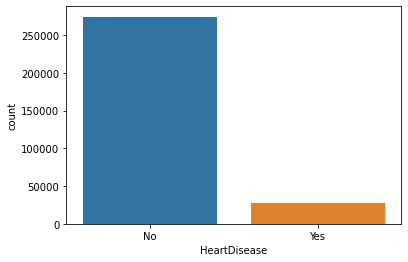

In [164]:
#Countplots for our Target variable Heart Disease
sns.countplot(x=cvd["HeartDisease"])

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

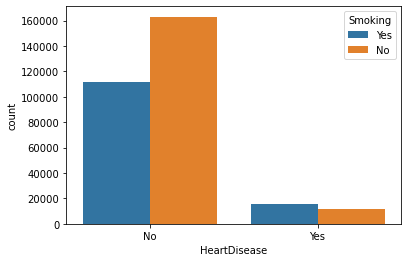

In [165]:
#People who have heart related diseases and if they smoke
sns.countplot(data=cvd, x="HeartDisease", hue="Smoking")

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

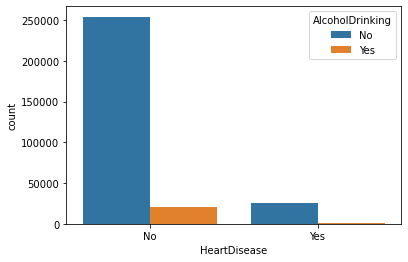

In [166]:
#People who have heart related diseases and if they consume Alcohol
sns.countplot(data=cvd, x="HeartDisease", hue="AlcoholDrinking")

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

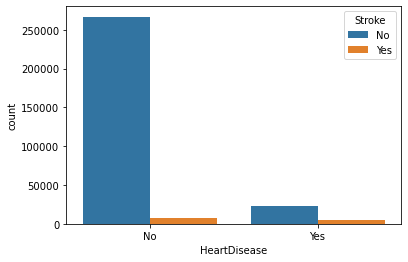

In [167]:
#People who have heart related diseases and if they suffered from a Stroke
sns.countplot(data=cvd, x="HeartDisease", hue="Stroke")

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

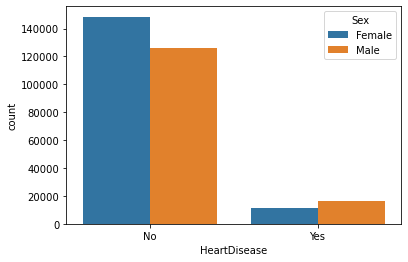

In [168]:
#Genderwise Heartdisease
sns.countplot(data=cvd, x="HeartDisease", hue="Sex")

<AxesSubplot:xlabel='count', ylabel='AgeCategory'>

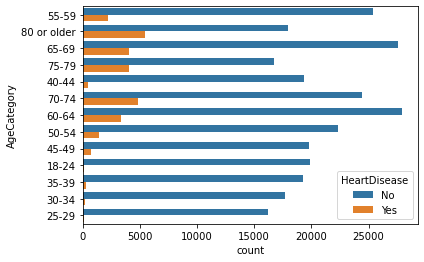

In [169]:
#Age Category wise Heart Disease 
sns.countplot(data=cvd, y="AgeCategory", hue="HeartDisease")

<AxesSubplot:xlabel='count', ylabel='Race'>

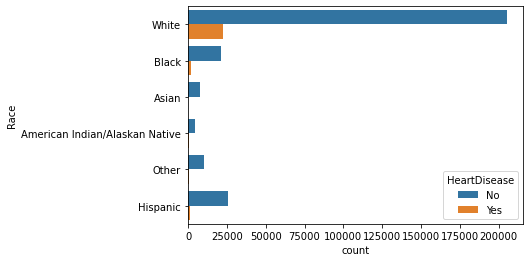

In [170]:
#Age Category wise Heart Disease 
sns.countplot(data=cvd, y="Race", hue="HeartDisease")

In [171]:
#As The Observations in Race Category is highly imbalanced, it would not contribute towards our Analysis so, we drop the column
cvd.drop(['Race'], axis=1)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,No,No,Good,12.0,No,No,No


<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

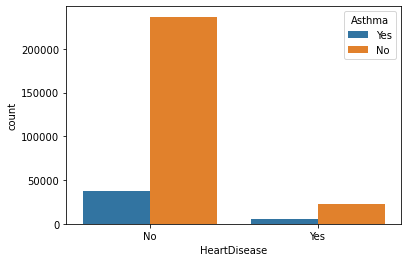

In [172]:
#Heartdisease and Asthma
sns.countplot(data=cvd, x="HeartDisease", hue="Asthma")

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

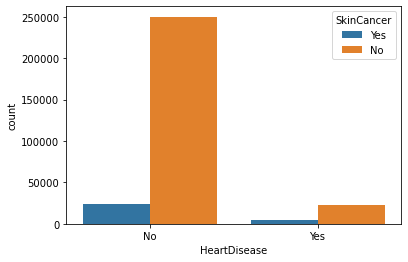

In [173]:
#Heartdisease and Skin Cancer
sns.countplot(data=cvd, x="HeartDisease", hue="SkinCancer")

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

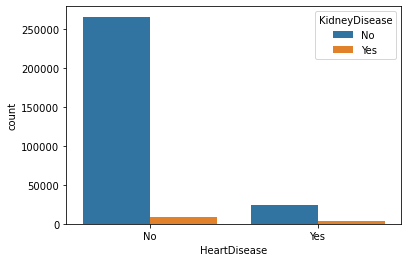

In [174]:
#Heartdisease and Skin Cancer
sns.countplot(data=cvd, x="HeartDisease", hue="KidneyDisease")

<AxesSubplot:xlabel='BMI'>

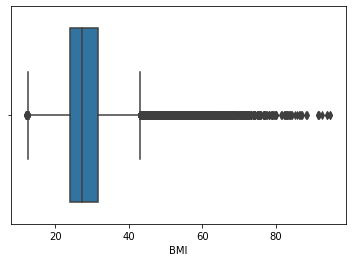

In [175]:
#Outlier Analysis
#Boxplot for BMI
sns.boxplot(x=cvd["BMI"])

In [176]:
#Calculating the IQR for each column
def outlier_treatment(datacolumn):
 sorted(datacolumn)
 Q1,Q3 = np.percentile(datacolumn , [25,75])
 IQR = Q3 - Q1
 lower_range = Q1 - (1.5 * IQR)
 upper_range = Q3 + (1.5 * IQR)
 return lower_range,upper_range

In [177]:
lowerbound,upperbound = outlier_treatment(cvd.BMI)

In [178]:
cvd[(cvd.BMI < lowerbound) | (cvd.BMI > upperbound)]

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
32,No,45.35,No,No,No,30.0,0.0,Yes,Male,70-74,White,Yes,No,Good,8.0,No,No,No
57,No,46.52,Yes,No,No,30.0,0.0,No,Male,65-69,White,Yes,No,Poor,8.0,Yes,No,No
90,No,44.29,No,No,No,30.0,10.0,Yes,Female,70-74,White,No,No,Fair,7.0,No,No,Yes
105,No,58.54,No,No,No,30.0,0.0,Yes,Male,65-69,Other,"No, borderline diabetes",Yes,Poor,3.0,Yes,No,No
107,No,45.42,No,No,No,0.0,0.0,No,Female,45-49,White,No,Yes,Very good,7.0,Yes,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319636,No,47.55,No,No,No,0.0,0.0,No,Female,55-59,Hispanic,No,No,Fair,7.0,Yes,No,No
319693,No,44.29,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,Yes,Very good,7.0,No,No,No
319709,No,51.46,Yes,No,No,30.0,0.0,No,Male,55-59,Hispanic,No,Yes,Good,7.0,Yes,No,No
319725,No,53.16,No,No,No,29.0,0.0,Yes,Male,25-29,Hispanic,"No, borderline diabetes",No,Fair,5.0,Yes,No,No


In [179]:
cvd.drop(cvd[ (cvd.BMI > upperbound) | (cvd.BMI < lowerbound) ].index , inplace=True)

In [180]:
cvd.shape

(292812, 18)

<AxesSubplot:xlabel='PhysicalHealth'>

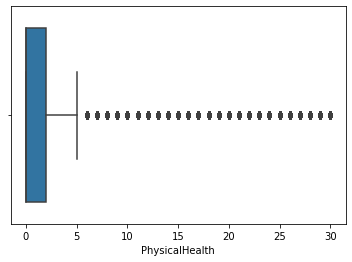

In [181]:
#Boxplot for PhysicalHealth
sns.boxplot(x=cvd["PhysicalHealth"])

<AxesSubplot:xlabel='MentalHealth'>

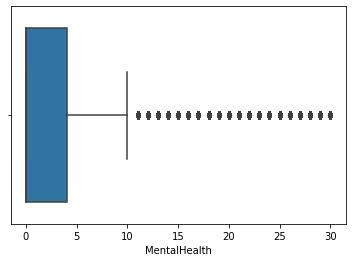

In [182]:
#Boxplot for MentalHealth
sns.boxplot(x=cvd["MentalHealth"])

<AxesSubplot:xlabel='SleepTime'>

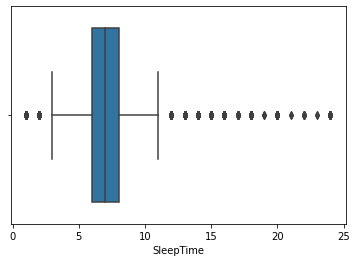

In [183]:
sns.boxplot(x=cvd["SleepTime"])

In [184]:
# summary statistics for all numerical variables
num_vars = cvd.select_dtypes(include='number')  # Select only numerical variables
summary_stats = num_vars.describe()

# Print the summary statistics
print(summary_stats.round(2))


             BMI  PhysicalHealth  MentalHealth  SleepTime
count  292812.00       292812.00     292812.00  292812.00
mean       27.83            3.45          4.03       7.09
std         5.39            8.00          8.04       1.46
min        12.65            0.00          0.00       1.00
25%        23.83            0.00          0.00       6.00
50%        27.26            0.00          0.00       7.00
75%        31.19            2.00          4.00       8.00
max        43.08           30.00         30.00      24.00


In [185]:
#Data Transformation
cvd['AgeCategory'].replace({'18-24':0,'25-29':1,'30-34':2,'35-39':3,'40-44':4,'45-49':5,'50-54':6,'55-59':7,'60-64':8,'65-69':9,'70-74':10,'75-79':10,'80 or older':11}, inplace=True)

In [186]:
cvd['Race'].replace({'White':0,'Hispanic':1,'Black':2,'Asian':3,'American Indian/Alaskan Native':4,'Other':5}, inplace=True)

In [187]:
cvd['GenHealth'].replace({'Excellent':0,'Very good':1,'Good':2,'Fair':3,'Poor':4}, inplace=True)

In [188]:
cvd=cvd.replace("No",0)
cvd=cvd.replace("Yes",1)
cvd=cvd.replace("Male",0)
cvd=cvd.replace("Female",1)
cvd=cvd.replace("No, borderline diabetes",0)
cvd=cvd.replace("Yes (during pregnancy)",1)

In [189]:
cvd

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,1,7,0,1,1,1,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,1,11,0,0,1,1,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,0,9,0,1,1,3,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,1,10,0,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,1,4,0,0,1,1,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319789,0,22.22,0,0,0,0.0,0.0,0,1,0,1,0,1,0,8.0,0,0,0
319790,1,27.41,1,0,0,7.0,0.0,1,0,8,1,1,0,3,6.0,1,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,0,3,1,0,1,1,5.0,1,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,1,5,1,0,1,2,6.0,0,0,0


<AxesSubplot:>

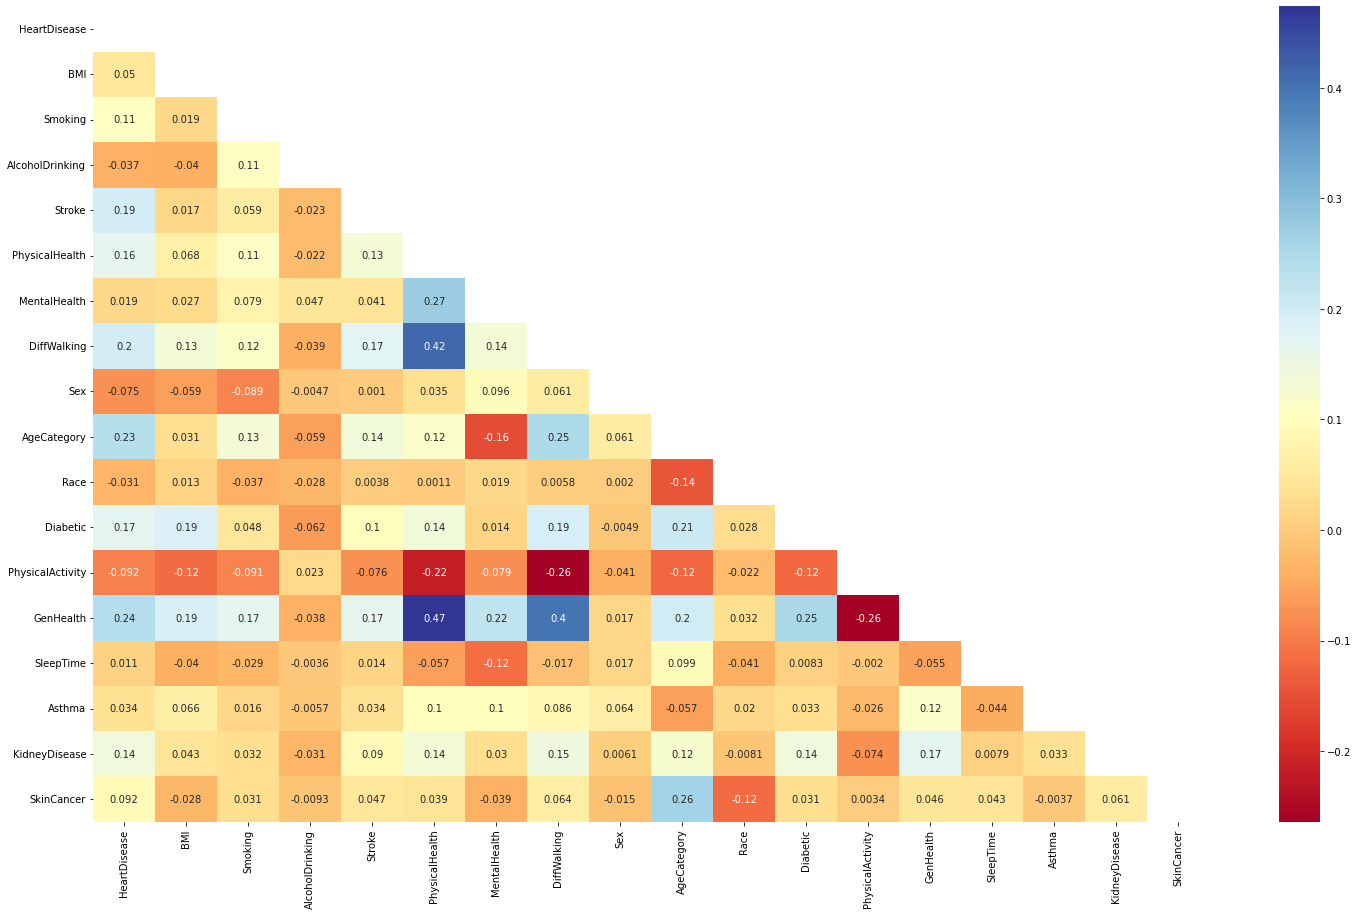

In [190]:
#Corelation Matrix
corr = cvd.corr()
ax , fig  = plt.subplots(figsize =(25,15))
# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(corr)

# using the upper triangle matrix as mask 
sns.heatmap(corr,cmap='RdYlBu', annot=True, mask=matrix)

In [191]:
y_logr= cvd[['HeartDisease']]
x_logr= cvd.drop(['HeartDisease'],axis=1)

In [192]:
#Logistic Regression Model
from sklearn.model_selection import train_test_split
x_train, x_test, z_train, z_test = train_test_split(x_logr, y_logr, test_size=0.40)

Xlog2 = sm.add_constant(x_train) 
logr_model = sm.Logit(z_train, Xlog2) 
logr_fit = logr_model.fit(alpha = 0.1)
print(logr_fit.summary())

import sklearn.metrics as metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

logreg = LogisticRegression()

logreg.fit(x_train,z_train)
z_pred=logreg.predict(x_test)
cnf_matrix = metrics.confusion_matrix(z_test, z_pred)
print(cnf_matrix)
#classification report
class_report = classification_report(z_test, z_pred)

print(class_report)

/Users/omkarsadekar/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/optimizer.py:17: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method newton is: tol. The list of unsupported keyword arguments passed include: alpha. After release 0.14, this will raise.
  warnings.warn(


Optimization terminated successfully.
         Current function value: 0.235450
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:           HeartDisease   No. Observations:               175687
Model:                          Logit   Df Residuals:                   175669
Method:                           MLE   Df Model:                           17
Date:                Mon, 08 May 2023   Pseudo R-squ.:                  0.2180
Time:                        03:08:37   Log-Likelihood:                -41365.
converged:                       True   LL-Null:                       -52895.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -5.9357      0.084    -70.541      0.000      -6.101      -5.771
BMI        

/Users/omkarsadekar/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[105351   1217]
 [  9279   1278]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.95    106568
           1       0.51      0.12      0.20     10557

    accuracy                           0.91    117125
   macro avg       0.72      0.55      0.57    117125
weighted avg       0.88      0.91      0.88    117125



/Users/omkarsadekar/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [196]:
#Decision Tree Model
dt_model = DecisionTreeClassifier(criterion="gini", random_state=42,max_depth=5, min_samples_leaf=5, class_weight={0: 1, 1: 5})   
dt_model.fit(x_train,z_train)
#Accuracy
z_predict = dt_model.predict(x_test)
print(accuracy_score(z_test,z_predict))
#Confusion Matrix
print(confusion_matrix(z_test, z_predict))
print(classification_report(z_test, z_predict))
#Exporting Tree Model
from sklearn import tree
from sklearn.tree import export_graphviz
import graphviz
dot_data = tree.export_graphviz(dt_model, out_file=None, feature_names=x_logr.columns, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("BRFSS_stroke2")

0.8090843116328709
[[88241 18327]
 [ 4034  6523]]
              precision    recall  f1-score   support

           0       0.96      0.83      0.89    106568
           1       0.26      0.62      0.37     10557

    accuracy                           0.81    117125
   macro avg       0.61      0.72      0.63    117125
weighted avg       0.89      0.81      0.84    117125



'BRFSS_stroke2.pdf'

In [194]:
#Feature Importance
importances = dt_model.feature_importances_
indices = np.argsort(importances)
feat_dict= {}
for col, val in sorted(zip(x_train.columns, dt_model.feature_importances_),key=lambda x:x[1],reverse=True):
  feat_dict[col]=val
feat_df = pd.DataFrame({'Feature':feat_dict.keys(),'Importance':feat_dict.values()})
feat_df

,Feature,Importance
0,AgeCategory,0.532607
1,GenHealth,0.325206
2,Stroke,0.068393
3,Sex,0.067402
4,Diabetic,0.004094
5,KidneyDisease,0.001015
6,DiffWalking,0.000832
7,Race,0.000275
8,PhysicalHealth,0.000176
9,BMI,0.000000


In [195]:
#Random Forest Model
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42,max_depth=4,n_estimators=1000,class_weight={0: 1, 1: 5})   
rf_model.fit(x_train,z_train)

zrf_predict = rf_model.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(accuracy_score(z_test,zrf_predict))

#Confusion Matrix

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(z_test, zrf_predict))
print(classification_report(z_test, zrf_predict))

#Feature Importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)
feat_dict1= {}
for col, val in sorted(zip(x_train.columns, rf_model.feature_importances_),key=lambda x:x[1],reverse=True):
  feat_dict1[col]=val
feat_df1 = pd.DataFrame({'Feature':feat_dict1.keys(),'Importance':feat_dict1.values()})
feat_df1

/var/folders/0n/4y67mytn7gx0m219_th1k1jw0000gn/T/ipykernel_3615/1495782755.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(x_train,z_train)


0.8702582710779082
[[97403  9165]
 [ 6031  4526]]
              precision    recall  f1-score   support

           0       0.94      0.91      0.93    106568
           1       0.33      0.43      0.37     10557

    accuracy                           0.87    117125
   macro avg       0.64      0.67      0.65    117125
weighted avg       0.89      0.87      0.88    117125



,Feature,Importance
0,AgeCategory,0.345360
1,GenHealth,0.235720
2,DiffWalking,0.120845
3,Stroke,0.091313
4,Diabetic,0.078648
5,PhysicalHealth,0.039753
6,Sex,0.026140
7,KidneyDisease,0.023173
8,Smoking,0.019075
9,SkinCancer,0.009622
